In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread

In [7]:
n_colors = 3

image = imread("images/modelo.jpg")
image = np.array(image, dtype=np.float64) / 255.0

w, h, d = original_shape = tuple(image.shape)

image_array = np.reshape(image, (w * h, d))

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)

labels = kmeans.predict(image_array)


def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [8]:
predict_image = recreate_image(kmeans.cluster_centers_, labels, w, h)

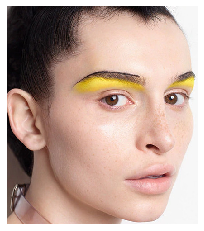

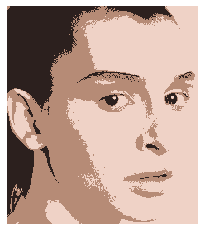

In [9]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.imshow(image)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.imshow(predict_image)